This script contains subplots of the rainy season onset and cessation for the East and West of all 4 bioclimatic zones and West Africa
===

In [1]:
#import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#load data
# file = 'chirps_full_WA.nc'
# data = xr.open_dataset(file)
data = xr.open_dataset('chirps_full_WA.nc')
data = data['precip'].where(data['precip']!=-99)

In [3]:
# data

In [4]:
#extracting data for part of the East and West of the 4 Bioclimatic zones
# West

GBZ_W = data.sel(latitude=slice(4,8),longitude=slice(-15,0))
Sudano_W = data.sel(latitude=slice(8,12),longitude=slice(-15,0))
Sahel_W = data.sel(latitude=slice(12,16),longitude=slice(-15,0))
Sahara_W = data.sel(latitude=slice(16,20),longitude=slice(-15,0))
WA_W= data.sel(latitude=slice(4,20),longitude=slice(-15,0))


# East
GBZ_E = data.sel(latitude=slice(4,8),longitude=slice(5,18))
Sudano_E = data.sel(latitude=slice(8,12),longitude=slice(5,18))
Sahel_E = data.sel(latitude=slice(12,16),longitude=slice(5,18))
Sahara_E = data.sel(latitude=slice(16,20),longitude=slice(5,18))
WA_E= data.sel(latitude=slice(4,20),longitude=slice(5,18))




In [5]:
#Grouping the data by the Jullian day 
doy_Sahara_W = Sahara_W.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_Sahel_W = Sahel_W.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_Sudano_W = Sudano_W.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_GBZ_W = GBZ_W.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_WA_W = WA_W.mean(['longitude','latitude']).groupby('time.dayofyear')


doy_Sahara_E = Sahara_E.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_Sahel_E = Sahel_E.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_Sudano_E = Sudano_E.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_GBZ_E = GBZ_E.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_WA_E = WA_E.mean(['longitude','latitude']).groupby('time.dayofyear')



In [6]:
# doy_WA_E[60]

In [7]:
# doy_WA_W[60]

In [8]:
#Function for Anomaly Computation & Data Check for inf values
def ano(x,dim):
    return (x-x.mean(dim=dim))

def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

In [9]:
# x = list(doy_Sahara_W.groups.copy())
# fig, ax = plt.subplots(figsize=(8,5))

# avg_data = inf_check(doy_Sahara_W.mean(),grid=True)
# avg_data.plot(ax = ax,color='r',label='RR')
# ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# # legend
# ax.legend(loc='upper left', fontsize=12)
# ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

# ax.set_xlabel('Day of Year', fontsize=14)


# ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


# ax1 = ax.twinx()
# anom = ano(avg_data, dim='dayofyear').cumsum()
# ax1.plot(x, anom, color='g', linewidth=3)
# ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

# #Onset and Cessation Detection                 
# anomaly = anom.values
# dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
# onset = []; cessation=[]
# for i in range(dx,len(anomaly)-dx):
#     if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
#         onset.append([i+1,anomaly[i+1]])
#     if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
#        cessation.append([i+1, anomaly[i+1]])    
            
# ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
# ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
# ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      

                

West of All zones and West Africa
===

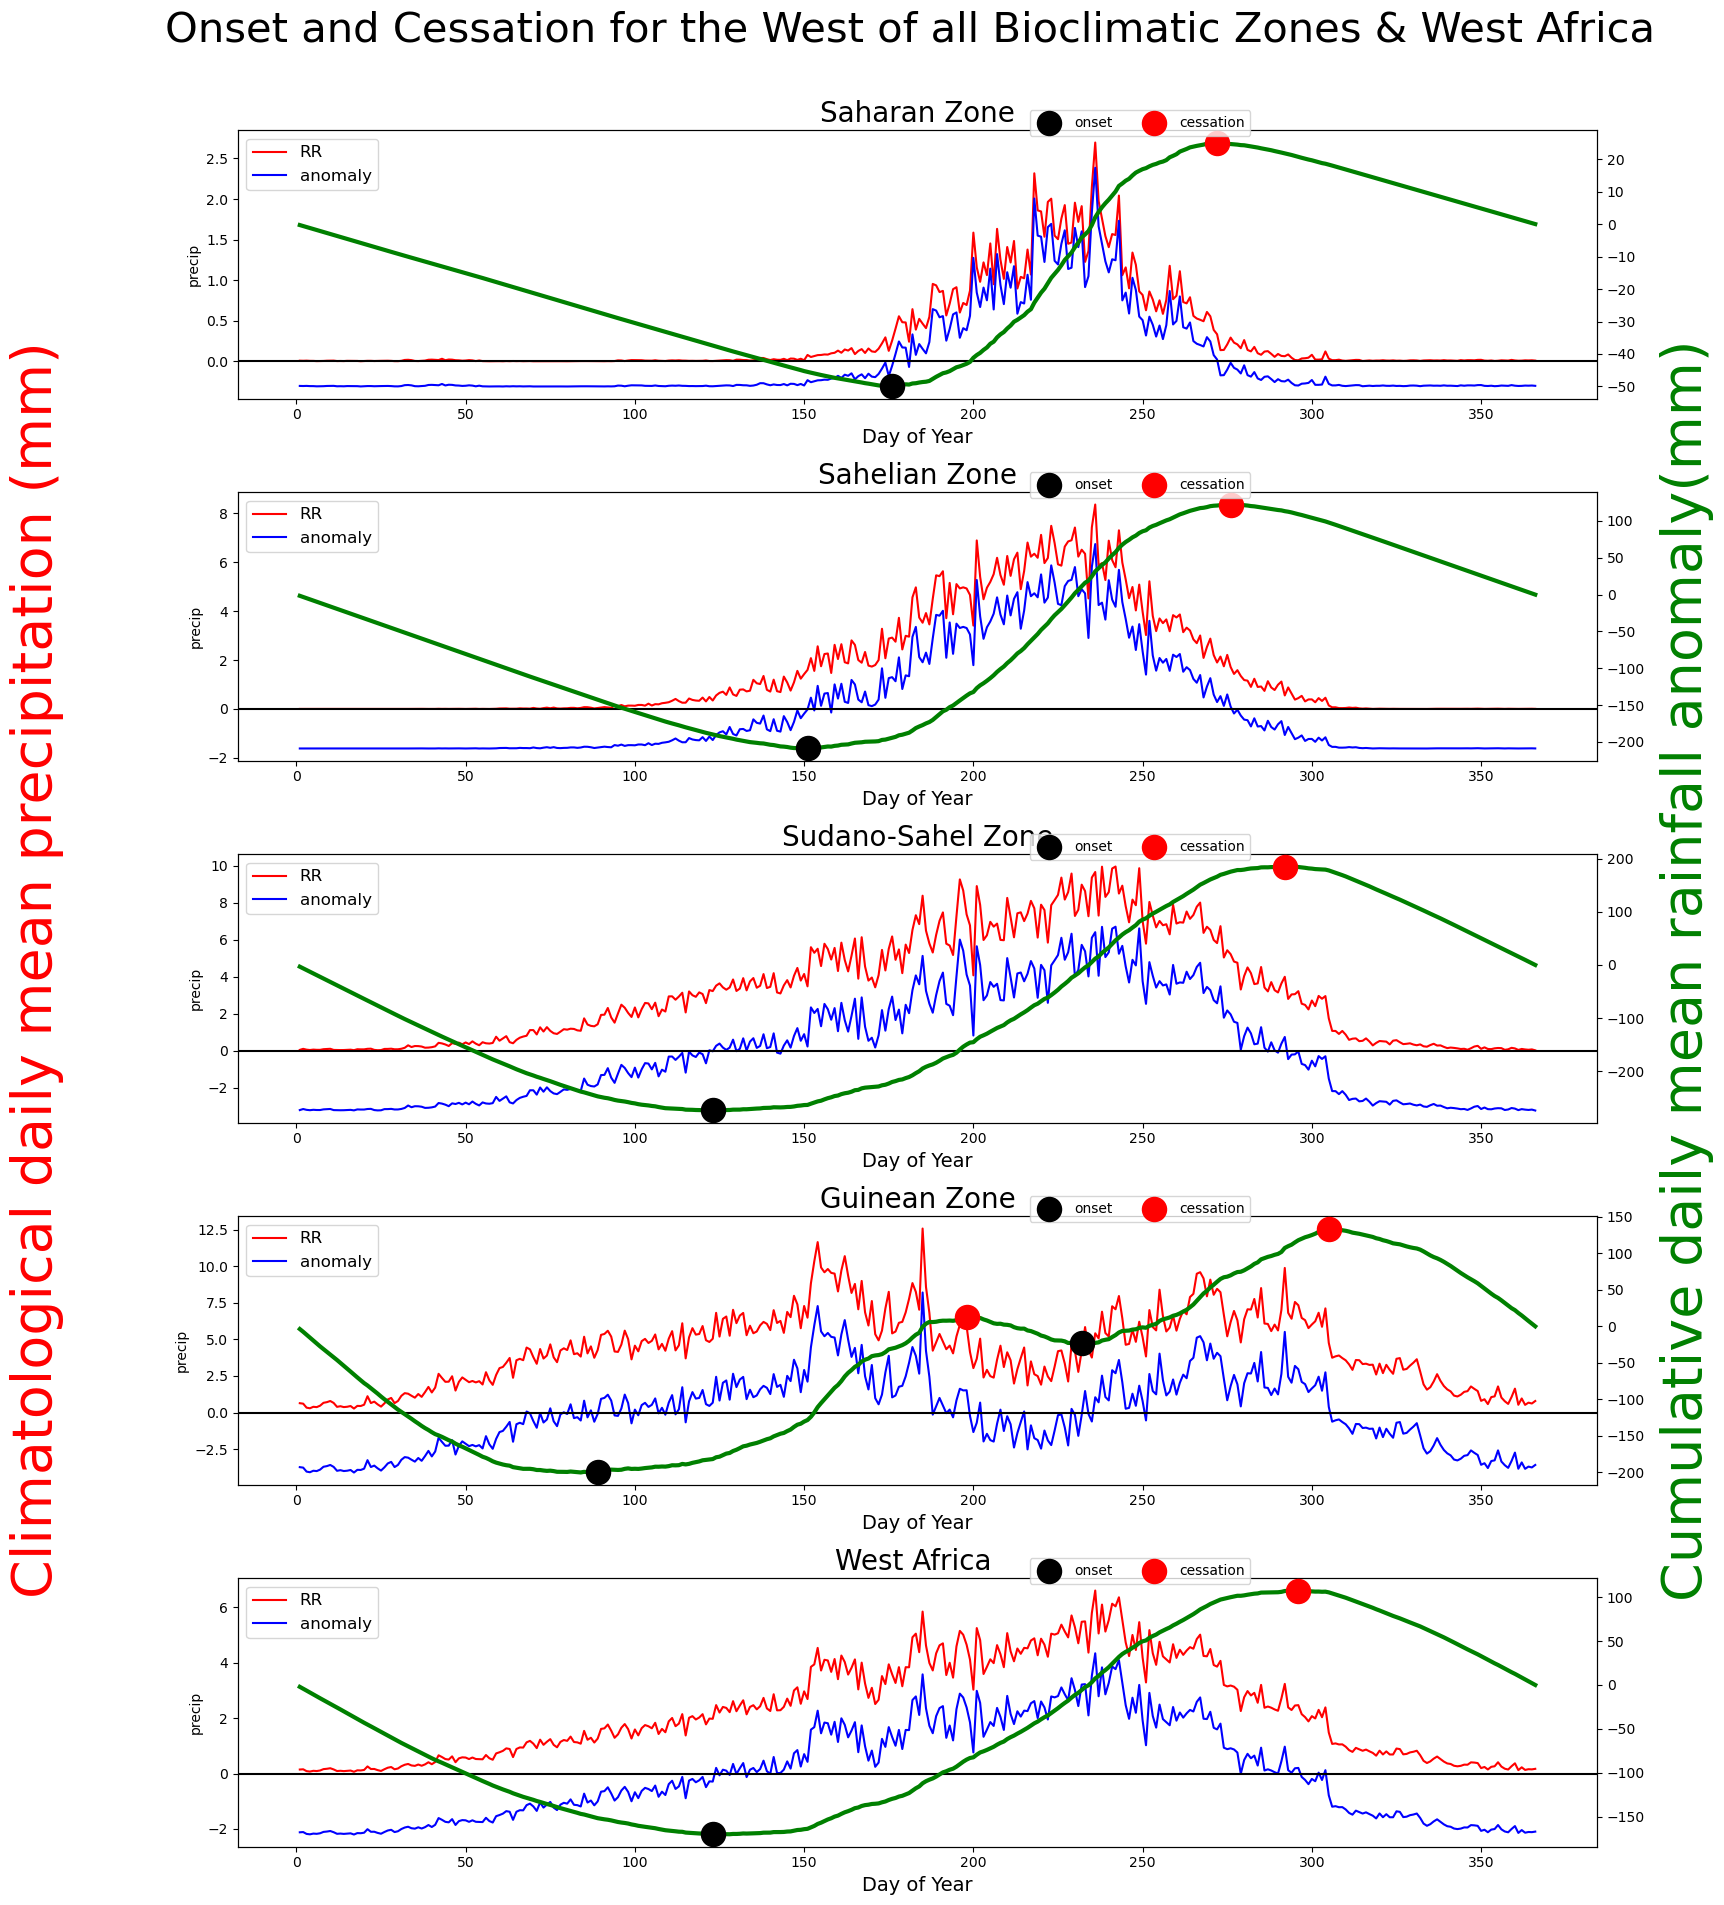

In [10]:
x_Sahara_W = list(doy_Sahara_W.groups.copy())
x_Sahel_W = list(doy_Sahel_W.groups.copy())
x_Sudano_W = list(doy_Sudano_W.groups.copy())
x_GBZ_W = list(doy_GBZ_W.groups.copy())
x_WA_W = list(doy_WA_W.groups.copy())

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(15,20))

fig.suptitle('Onset and Cessation for the West of all Bioclimatic Zones & West Africa', fontsize=30)
fig.text(-0.1, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical',fontsize=40, color='r')
fig.text(1, 0.5, 'Cumulative daily mean rainfall anomaly(mm)', va='center', rotation='vertical', fontsize=40, color='g')
# fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=20)
plt.subplots_adjust(hspace=1)

# 1st subplot
ax=axes[0]
avg_data = inf_check(doy_Sahara_W.mean(),grid=True)
avg_data.plot(ax = axes[0],color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[0].legend(loc='upper left', fontsize=12)

axes[0].set_xlabel('Day of Year', fontsize=14)


axes[0].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[0] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[0].plot(x_Sahara_W, anom, color='g', linewidth=3)
# axes[0].set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe

#Onset and Cessation Detection
# axes[0]
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[0].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[0].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[0].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))   
axes[0].set_title('Saharan Zone', fontsize=20)

# 2nd subplot
ax=axes[1]
avg_data = inf_check(doy_Sahel_W.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[1].legend(loc='upper left', fontsize=12)

axes[1].set_xlabel('Day of Year', fontsize=14)


axes[1].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[1] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[1].plot(x_Sahel_W, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[1].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[1].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[1].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[1].set_title('Sahelian Zone', fontsize=20)

# 3rd subplot
ax=axes[2]
avg_data = inf_check(doy_Sudano_W.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[2].legend(loc='upper left', fontsize=12)

axes[2].set_xlabel('Day of Year', fontsize=14)


axes[2].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[2] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[2].plot(x_Sudano_W, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[2].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[2].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[2].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[2].set_title('Sudano-Sahel Zone', fontsize=20)


# 4th subplot
ax=axes[3]
avg_data = inf_check(doy_GBZ_W.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[3].legend(loc='upper left', fontsize=12)

axes[3].set_xlabel('Day of Year', fontsize=14)


axes[3].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[3] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[3].plot(x_GBZ_W, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 12 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[3].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[3].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[3].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[3].set_title('Guinean Zone', fontsize=20)


# 5th subplot
ax=axes[4]
avg_data = inf_check(doy_WA_W.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[4].legend(loc='upper left', fontsize=12)

axes[4].set_xlabel('Day of Year', fontsize=14)


axes[4].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[4] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[4].plot(x_WA_W, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[4].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[4].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[4].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[4].set_title('West Africa ', fontsize=20)

plt.show
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig('Bioclimatic_zones_WEST')

In [11]:
onset[0]

[123, -169.96364]

East of All Bioclimatic Zones & West Africa
===

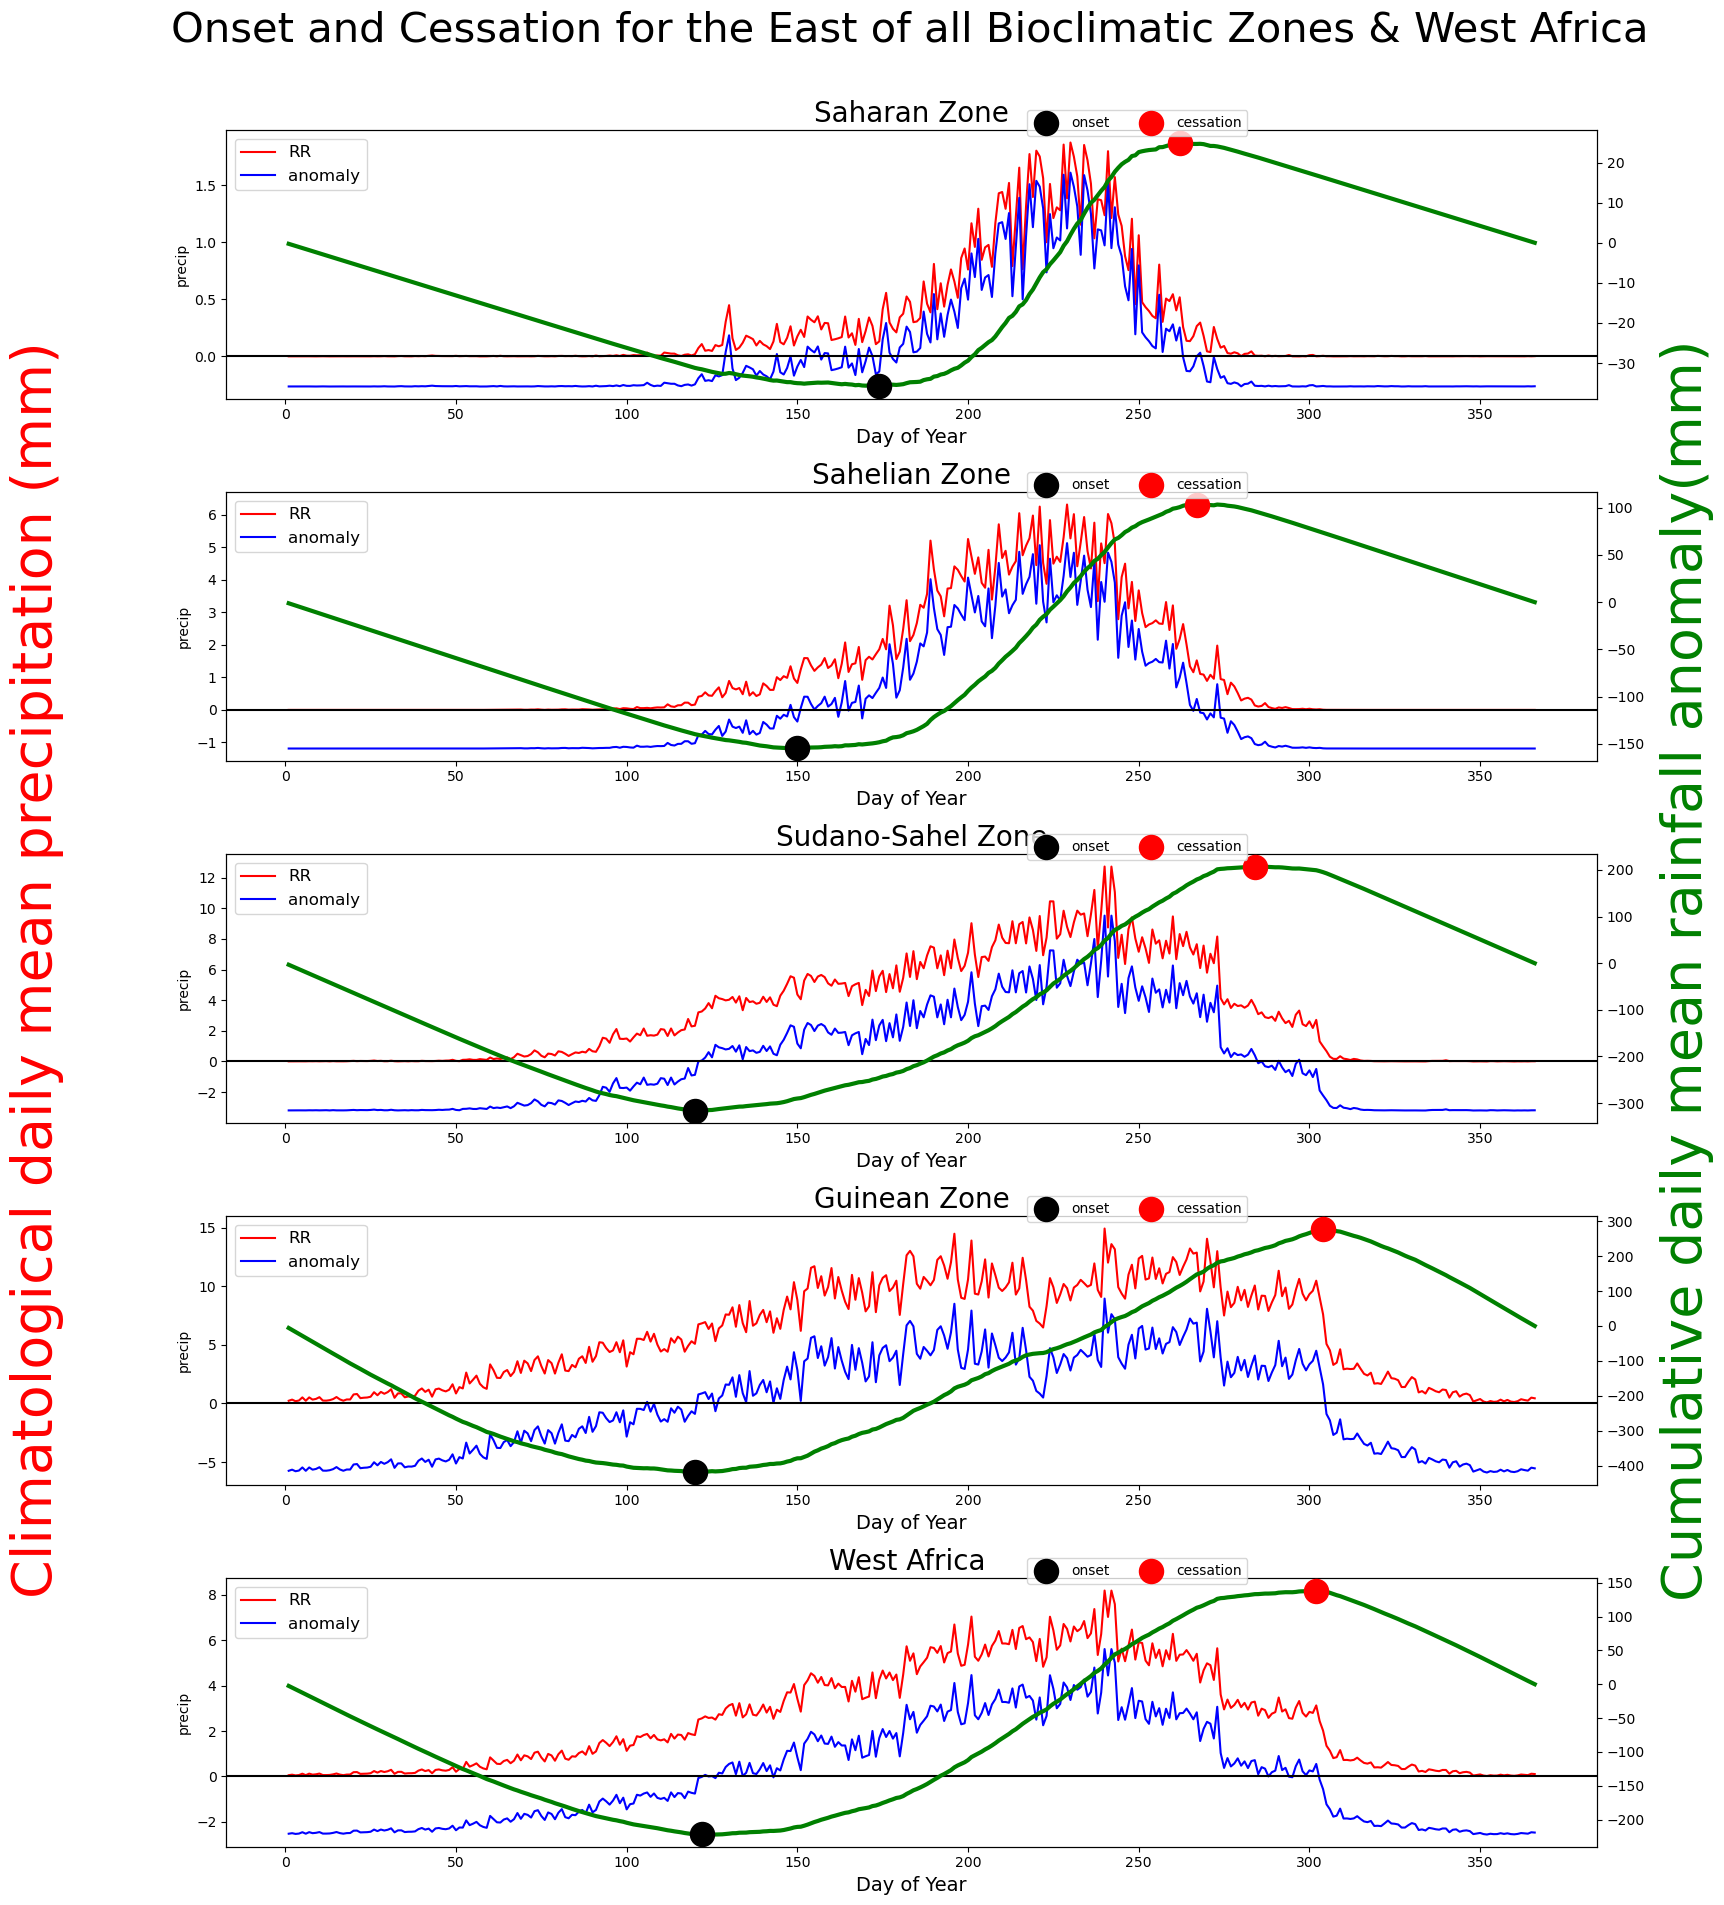

In [16]:
x_Sahara_E = list(doy_Sahara_E.groups.copy())
x_Sahel_E = list(doy_Sahel_E.groups.copy())    
x_Sudano_E=list(doy_Sudano_E.groups.copy())
x_GBZ_E= list(doy_GBZ_E.groups.copy())
x_WA_E= list(doy_WA_E.groups.copy())

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(15,20))

fig.suptitle('Onset and Cessation for the East of all Bioclimatic Zones & West Africa', fontsize=30)
fig.text(-0.1, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical',fontsize=40, color='r')
fig.text(1, 0.5, 'Cumulative daily mean rainfall anomaly(mm)', va='center', rotation='vertical', fontsize=40, color='g')
# fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=20)
plt.subplots_adjust(hspace=1)

# 1st subplot
ax=axes[0]
avg_data = inf_check(doy_Sahara_E.mean(),grid=True)
avg_data.plot(ax = axes[0],color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[0].legend(loc='upper left', fontsize=12)

axes[0].set_xlabel('Day of Year', fontsize=14)


axes[0].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[0] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[0].plot(x_Sahara_E, anom, color='g', linewidth=3)
# axes[0].set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe

#Onset and Cessation Detection
# axes[0]
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[0].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[0].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[0].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))   
axes[0].set_title('Saharan Zone', fontsize=20)

# 2nd subplot
ax=axes[1]
avg_data = inf_check(doy_Sahel_E.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[1].legend(loc='upper left', fontsize=12)

axes[1].set_xlabel('Day of Year', fontsize=14)


axes[1].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[1] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[1].plot(x_Sahel_E, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[1].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[1].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[1].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[1].set_title('Sahelian Zone', fontsize=20)

# 3rd subplot
ax=axes[2]
avg_data = inf_check(doy_Sudano_E.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[2].legend(loc='upper left', fontsize=12)

axes[2].set_xlabel('Day of Year', fontsize=14)


axes[2].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[2] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[2].plot(x_Sudano_E, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[2].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[2].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[2].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[2].set_title('Sudano-Sahel Zone', fontsize=20)


# 4th subplot
ax=axes[3]
avg_data = inf_check(doy_GBZ_E.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[3].legend(loc='upper left', fontsize=12)

axes[3].set_xlabel('Day of Year', fontsize=14)


axes[3].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[3] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[3].plot(x_GBZ_E, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 12 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[3].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[3].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[3].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[3].set_title('Guinean Zone', fontsize=20)


# 5th subplot
ax=axes[4]
avg_data = inf_check(doy_WA_E.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
axes[4].legend(loc='upper left', fontsize=12)

axes[4].set_xlabel('Day of Year', fontsize=14)


axes[4].axhline(y=0, color='k')   #horizontal black line at the zero mark
axes[4] = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
axes[4].plot(x_WA_E, anom, color='g', linewidth=3)

anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

axes[4].scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
axes[4].scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
axes[4].legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
axes[4].set_title('West Africa ', fontsize=20)

plt.show
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig('Bioclimatic_zones_EAST')

In [13]:
axes[0]onset[0]

SyntaxError: invalid syntax (888651851.py, line 1)

In [ ]:
onset[0]

In [ ]:
axes[1]